In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import joblib
from sklearn.linear_model import LinearRegression

# Download stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\swath\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# Load the dataset
df = pd.read_csv('C:\\Users\\swath\\Downloads\\imdb-movies-dataset.csv')

In [3]:
df

,Poster,Title,Year,Certificate,Duration (min),Genre,Rating,Metascore,Director,Cast,Votes,Description,Review Count,Review Title,Review
0,https://m.media-amazon.com/images/M/MV5BYWRkZj...,The Idea of You,2023.0,R,115.0,"Comedy, Drama, Romance",6.4,67.0,Michael Showalter,"Anne Hathaway, Nicholas Galitzine, Ella Rubin,...","28,744","Solène, a 40-year-old single mom, begins an un...",166,Hypocrisy as an idea,"This film, as well as the reaction to it, is a..."
1,https://m.media-amazon.com/images/M/MV5BZGI4NT...,Kingdom of the Planet of the Apes,2023.0,PG-13,145.0,"Action, Adventure, Sci-Fi",7.3,66.0,Wes Ball,"Owen Teague, Freya Allan, Kevin Durand, Peter ...","22,248","Many years after the reign of Caesar, a young ...",183,A phenomenal start to another trilogy!,"I'm a big fan of all the planet of the apes, a..."
2,https://m.media-amazon.com/images/M/MV5BZjIyOT...,Unfrosted,2023.0,PG-13,97.0,"Biography, Comedy, History",5.5,42.0,Jerry Seinfeld,"Isaac Bae, Jerry Seinfeld, Chris Rickett, Rach...","18,401","In 1963 Michigan, business rivals Kellogg's an...",333,not funny,Pretty much the worst criticism you can lay on...
3,https://m.media-amazon.com/images/M/MV5BMjA5Zj...,The Fall Guy,2023.0,PG-13,126.0,"Action, Comedy, Drama",7.3,73.0,David Leitch,"Ryan Gosling, Emily Blunt, Aaron Taylor-Johnso...","38,953",A down-and-out stuntman must find the missing ...,384,Everything you needed and more!,Just got out of the Austin premier at SXSW and...
4,https://m.media-amazon.com/images/M/MV5BNTk1MT...,Challengers,2023.0,R,131.0,"Drama, Romance, Sport",7.7,82.0,Luca Guadagnino,"Zendaya, Mike Faist, Josh O'Connor, Darnell Ap...","32,517","Tashi, a former tennis prodigy turned coach, t...",194,"Watch ""Match Point"" instead",This is a tough one. I liked the concept and t...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,https://m.media-amazon.com/images/M/MV5BMzg5MW...,The Greatest Show on Earth,2020.0,U,152.0,"Drama, Family, Romance",6.5,76.0,Cecil B. DeMille,"James Stewart, Charlton Heston, Betty Hutton, ...","16,078","The dramatic lives of trapeze artists, a clown...",128,"Hey, doesn't anyone remember Last Emperor?",It constantly amazes me that people carp that ...
9996,https://m.media-amazon.com/images/M/MV5BYzA0ZG...,Berserk: Ougon Jidai-hen I - Haou no Tamago,2020.0,NaN,76.0,"Animation, Action, Adventure",7.5,NaN,Toshiyuki Kubooka,"Hiroaki Iwanaga, Carrie Keranen, Takahiro Saku...","14,300",A lone sellsword named Guts gets recruited int...,12,Masterfully directed climatic epic saga,Few stories can capture your mind and soul in ...
9997,https://m.media-amazon.com/images/M/MV5BM2U1Mj...,Is-slottet,2020.0,NaN,78.0,"Mystery, Drama",6.5,NaN,Per Blom,"Line Storesund, Hilde Nyeggen Martinsen, Meret...",740,A couple of twelve-year-old Norwegian girls st...,4,Beautiful Film,"This film might not be to everyone's taste, it..."
9998,https://m.media-amazon.com/images/M/MV5BMTAwOD...,Loving Pablo,2020.0,A,123.0,"Biography, Crime, Drama",6.4,42.0,Fernando León de Aranoa,"Javier Bardem, Penélope Cruz, Peter Sarsgaard,...","22,447",A journalist strikes up a romantic relationshi...,84,That film should be in Spanish,Why anyone (the director?) made Spanish actors...


In [4]:
df.head()

,Poster,Title,Year,Certificate,Duration (min),Genre,Rating,Metascore,Director,Cast,Votes,Description,Review Count,Review Title,Review
0,https://m.media-amazon.com/images/M/MV5BYWRkZj...,The Idea of You,2023.0,R,115.0,"Comedy, Drama, Romance",6.4,67.0,Michael Showalter,"Anne Hathaway, Nicholas Galitzine, Ella Rubin,...","28,744","Solène, a 40-year-old single mom, begins an un...",166,Hypocrisy as an idea,"This film, as well as the reaction to it, is a..."
1,https://m.media-amazon.com/images/M/MV5BZGI4NT...,Kingdom of the Planet of the Apes,2023.0,PG-13,145.0,"Action, Adventure, Sci-Fi",7.3,66.0,Wes Ball,"Owen Teague, Freya Allan, Kevin Durand, Peter ...","22,248","Many years after the reign of Caesar, a young ...",183,A phenomenal start to another trilogy!,"I'm a big fan of all the planet of the apes, a..."
2,https://m.media-amazon.com/images/M/MV5BZjIyOT...,Unfrosted,2023.0,PG-13,97.0,"Biography, Comedy, History",5.5,42.0,Jerry Seinfeld,"Isaac Bae, Jerry Seinfeld, Chris Rickett, Rach...","18,401","In 1963 Michigan, business rivals Kellogg's an...",333,not funny,Pretty much the worst criticism you can lay on...
3,https://m.media-amazon.com/images/M/MV5BMjA5Zj...,The Fall Guy,2023.0,PG-13,126.0,"Action, Comedy, Drama",7.3,73.0,David Leitch,"Ryan Gosling, Emily Blunt, Aaron Taylor-Johnso...","38,953",A down-and-out stuntman must find the missing ...,384,Everything you needed and more!,Just got out of the Austin premier at SXSW and...
4,https://m.media-amazon.com/images/M/MV5BNTk1MT...,Challengers,2023.0,R,131.0,"Drama, Romance, Sport",7.7,82.0,Luca Guadagnino,"Zendaya, Mike Faist, Josh O'Connor, Darnell Ap...","32,517","Tashi, a former tennis prodigy turned coach, t...",194,"Watch ""Match Point"" instead",This is a tough one. I liked the concept and t...


In [5]:
# Drop unnecessary columns 
df.drop(['Poster','Description'], axis=1, inplace=True)

In [6]:
df.isnull().sum()

Title                0
Year               150
Certificate       2630
Duration (min)     336
Genre                7
Rating             404
Metascore         2445
Director             5
Cast                39
Votes              404
Review Count         1
Review Title       517
Review             516
dtype: int64

In [7]:
df.dropna(inplace=True)  # Remove rows with missing values

In [8]:
df

,Title,Year,Certificate,Duration (min),Genre,Rating,Metascore,Director,Cast,Votes,Review Count,Review Title,Review
0,The Idea of You,2023.0,R,115.0,"Comedy, Drama, Romance",6.4,67.0,Michael Showalter,"Anne Hathaway, Nicholas Galitzine, Ella Rubin,...","28,744",166,Hypocrisy as an idea,"This film, as well as the reaction to it, is a..."
1,Kingdom of the Planet of the Apes,2023.0,PG-13,145.0,"Action, Adventure, Sci-Fi",7.3,66.0,Wes Ball,"Owen Teague, Freya Allan, Kevin Durand, Peter ...","22,248",183,A phenomenal start to another trilogy!,"I'm a big fan of all the planet of the apes, a..."
2,Unfrosted,2023.0,PG-13,97.0,"Biography, Comedy, History",5.5,42.0,Jerry Seinfeld,"Isaac Bae, Jerry Seinfeld, Chris Rickett, Rach...","18,401",333,not funny,Pretty much the worst criticism you can lay on...
3,The Fall Guy,2023.0,PG-13,126.0,"Action, Comedy, Drama",7.3,73.0,David Leitch,"Ryan Gosling, Emily Blunt, Aaron Taylor-Johnso...","38,953",384,Everything you needed and more!,Just got out of the Austin premier at SXSW and...
4,Challengers,2023.0,R,131.0,"Drama, Romance, Sport",7.7,82.0,Luca Guadagnino,"Zendaya, Mike Faist, Josh O'Connor, Darnell Ap...","32,517",194,"Watch ""Match Point"" instead",This is a tough one. I liked the concept and t...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9990,The Masque of the Red Death,2020.0,A,89.0,"Drama, Horror",6.9,77.0,Roger Corman,"Vincent Price, Hazel Court, Jane Asher, David ...","16,302",109,Price at his Most Wicked!,Roger Corman has done an outstanding job with ...
9993,South Central,2020.0,R,98.0,"Crime, Drama",6.8,64.0,Stephen Milburn Anderson,"Glenn Plummer, Byron Minns, Lexie Bigham, Vinc...","6,730",20,"""South Central was adapted from my novel ""Sout...",I would like to thank all of the fans and supp...
9994,Mutiny on the Bounty,2020.0,U,132.0,"Adventure, Biography, Drama",7.6,87.0,Frank Lloyd,"Charles Laughton, Clark Gable, Franchot Tone, ...","24,899",112,"Our Favorite ""Mutiny"": April 28, 1789",Although the versions with Marlon Brando and T...
9995,The Greatest Show on Earth,2020.0,U,152.0,"Drama, Family, Romance",6.5,76.0,Cecil B. DeMille,"James Stewart, Charlton Heston, Betty Hutton, ...","16,078",128,"Hey, doesn't anyone remember Last Emperor?",It constantly amazes me that people carp that ...


In [9]:
# Convert votes and rows to numeric
df['Votes'] = df['Votes'].str.replace(',', '').astype(float)
df['Review Count'] = df['Review Count'].str.replace(',', '').astype(float)

In [10]:
df

,Title,Year,Certificate,Duration (min),Genre,Rating,Metascore,Director,Cast,Votes,Review Count,Review Title,Review
0,The Idea of You,2023.0,R,115.0,"Comedy, Drama, Romance",6.4,67.0,Michael Showalter,"Anne Hathaway, Nicholas Galitzine, Ella Rubin,...",28744.0,166.0,Hypocrisy as an idea,"This film, as well as the reaction to it, is a..."
1,Kingdom of the Planet of the Apes,2023.0,PG-13,145.0,"Action, Adventure, Sci-Fi",7.3,66.0,Wes Ball,"Owen Teague, Freya Allan, Kevin Durand, Peter ...",22248.0,183.0,A phenomenal start to another trilogy!,"I'm a big fan of all the planet of the apes, a..."
2,Unfrosted,2023.0,PG-13,97.0,"Biography, Comedy, History",5.5,42.0,Jerry Seinfeld,"Isaac Bae, Jerry Seinfeld, Chris Rickett, Rach...",18401.0,333.0,not funny,Pretty much the worst criticism you can lay on...
3,The Fall Guy,2023.0,PG-13,126.0,"Action, Comedy, Drama",7.3,73.0,David Leitch,"Ryan Gosling, Emily Blunt, Aaron Taylor-Johnso...",38953.0,384.0,Everything you needed and more!,Just got out of the Austin premier at SXSW and...
4,Challengers,2023.0,R,131.0,"Drama, Romance, Sport",7.7,82.0,Luca Guadagnino,"Zendaya, Mike Faist, Josh O'Connor, Darnell Ap...",32517.0,194.0,"Watch ""Match Point"" instead",This is a tough one. I liked the concept and t...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9990,The Masque of the Red Death,2020.0,A,89.0,"Drama, Horror",6.9,77.0,Roger Corman,"Vincent Price, Hazel Court, Jane Asher, David ...",16302.0,109.0,Price at his Most Wicked!,Roger Corman has done an outstanding job with ...
9993,South Central,2020.0,R,98.0,"Crime, Drama",6.8,64.0,Stephen Milburn Anderson,"Glenn Plummer, Byron Minns, Lexie Bigham, Vinc...",6730.0,20.0,"""South Central was adapted from my novel ""Sout...",I would like to thank all of the fans and supp...
9994,Mutiny on the Bounty,2020.0,U,132.0,"Adventure, Biography, Drama",7.6,87.0,Frank Lloyd,"Charles Laughton, Clark Gable, Franchot Tone, ...",24899.0,112.0,"Our Favorite ""Mutiny"": April 28, 1789",Although the versions with Marlon Brando and T...
9995,The Greatest Show on Earth,2020.0,U,152.0,"Drama, Family, Romance",6.5,76.0,Cecil B. DeMille,"James Stewart, Charlton Heston, Betty Hutton, ...",16078.0,128.0,"Hey, doesn't anyone remember Last Emperor?",It constantly amazes me that people carp that ...


In [11]:
# Sentiment Labeling
def get_sentiment(text):
    analysis = TextBlob(text)     # A python library for processing textual data
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Review'].apply(get_sentiment)

In [12]:
df

,Title,Year,Certificate,Duration (min),Genre,Rating,Metascore,Director,Cast,Votes,Review Count,Review Title,Review,Sentiment
0,The Idea of You,2023.0,R,115.0,"Comedy, Drama, Romance",6.4,67.0,Michael Showalter,"Anne Hathaway, Nicholas Galitzine, Ella Rubin,...",28744.0,166.0,Hypocrisy as an idea,"This film, as well as the reaction to it, is a...",Positive
1,Kingdom of the Planet of the Apes,2023.0,PG-13,145.0,"Action, Adventure, Sci-Fi",7.3,66.0,Wes Ball,"Owen Teague, Freya Allan, Kevin Durand, Peter ...",22248.0,183.0,A phenomenal start to another trilogy!,"I'm a big fan of all the planet of the apes, a...",Positive
2,Unfrosted,2023.0,PG-13,97.0,"Biography, Comedy, History",5.5,42.0,Jerry Seinfeld,"Isaac Bae, Jerry Seinfeld, Chris Rickett, Rach...",18401.0,333.0,not funny,Pretty much the worst criticism you can lay on...,Negative
3,The Fall Guy,2023.0,PG-13,126.0,"Action, Comedy, Drama",7.3,73.0,David Leitch,"Ryan Gosling, Emily Blunt, Aaron Taylor-Johnso...",38953.0,384.0,Everything you needed and more!,Just got out of the Austin premier at SXSW and...,Positive
4,Challengers,2023.0,R,131.0,"Drama, Romance, Sport",7.7,82.0,Luca Guadagnino,"Zendaya, Mike Faist, Josh O'Connor, Darnell Ap...",32517.0,194.0,"Watch ""Match Point"" instead",This is a tough one. I liked the concept and t...,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9990,The Masque of the Red Death,2020.0,A,89.0,"Drama, Horror",6.9,77.0,Roger Corman,"Vincent Price, Hazel Court, Jane Asher, David ...",16302.0,109.0,Price at his Most Wicked!,Roger Corman has done an outstanding job with ...,Positive
9993,South Central,2020.0,R,98.0,"Crime, Drama",6.8,64.0,Stephen Milburn Anderson,"Glenn Plummer, Byron Minns, Lexie Bigham, Vinc...",6730.0,20.0,"""South Central was adapted from my novel ""Sout...",I would like to thank all of the fans and supp...,Positive
9994,Mutiny on the Bounty,2020.0,U,132.0,"Adventure, Biography, Drama",7.6,87.0,Frank Lloyd,"Charles Laughton, Clark Gable, Franchot Tone, ...",24899.0,112.0,"Our Favorite ""Mutiny"": April 28, 1789",Although the versions with Marlon Brando and T...,Positive
9995,The Greatest Show on Earth,2020.0,U,152.0,"Drama, Family, Romance",6.5,76.0,Cecil B. DeMille,"James Stewart, Charlton Heston, Betty Hutton, ...",16078.0,128.0,"Hey, doesn't anyone remember Last Emperor?",It constantly amazes me that people carp that ...,Positive


In [13]:
# Encode Sentiment Labels
label_encoder = LabelEncoder()
df['Sentiment_Label'] = label_encoder.fit_transform(df['Sentiment'])   # converted categorical to numerical positive - 2,negative - 0, neutral - 1


In [14]:
df

,Title,Year,Certificate,Duration (min),Genre,Rating,Metascore,Director,Cast,Votes,Review Count,Review Title,Review,Sentiment,Sentiment_Label
0,The Idea of You,2023.0,R,115.0,"Comedy, Drama, Romance",6.4,67.0,Michael Showalter,"Anne Hathaway, Nicholas Galitzine, Ella Rubin,...",28744.0,166.0,Hypocrisy as an idea,"This film, as well as the reaction to it, is a...",Positive,2
1,Kingdom of the Planet of the Apes,2023.0,PG-13,145.0,"Action, Adventure, Sci-Fi",7.3,66.0,Wes Ball,"Owen Teague, Freya Allan, Kevin Durand, Peter ...",22248.0,183.0,A phenomenal start to another trilogy!,"I'm a big fan of all the planet of the apes, a...",Positive,2
2,Unfrosted,2023.0,PG-13,97.0,"Biography, Comedy, History",5.5,42.0,Jerry Seinfeld,"Isaac Bae, Jerry Seinfeld, Chris Rickett, Rach...",18401.0,333.0,not funny,Pretty much the worst criticism you can lay on...,Negative,0
3,The Fall Guy,2023.0,PG-13,126.0,"Action, Comedy, Drama",7.3,73.0,David Leitch,"Ryan Gosling, Emily Blunt, Aaron Taylor-Johnso...",38953.0,384.0,Everything you needed and more!,Just got out of the Austin premier at SXSW and...,Positive,2
4,Challengers,2023.0,R,131.0,"Drama, Romance, Sport",7.7,82.0,Luca Guadagnino,"Zendaya, Mike Faist, Josh O'Connor, Darnell Ap...",32517.0,194.0,"Watch ""Match Point"" instead",This is a tough one. I liked the concept and t...,Positive,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9990,The Masque of the Red Death,2020.0,A,89.0,"Drama, Horror",6.9,77.0,Roger Corman,"Vincent Price, Hazel Court, Jane Asher, David ...",16302.0,109.0,Price at his Most Wicked!,Roger Corman has done an outstanding job with ...,Positive,2
9993,South Central,2020.0,R,98.0,"Crime, Drama",6.8,64.0,Stephen Milburn Anderson,"Glenn Plummer, Byron Minns, Lexie Bigham, Vinc...",6730.0,20.0,"""South Central was adapted from my novel ""Sout...",I would like to thank all of the fans and supp...,Positive,2
9994,Mutiny on the Bounty,2020.0,U,132.0,"Adventure, Biography, Drama",7.6,87.0,Frank Lloyd,"Charles Laughton, Clark Gable, Franchot Tone, ...",24899.0,112.0,"Our Favorite ""Mutiny"": April 28, 1789",Although the versions with Marlon Brando and T...,Positive,2
9995,The Greatest Show on Earth,2020.0,U,152.0,"Drama, Family, Romance",6.5,76.0,Cecil B. DeMille,"James Stewart, Charlton Heston, Betty Hutton, ...",16078.0,128.0,"Hey, doesn't anyone remember Last Emperor?",It constantly amazes me that people carp that ...,Positive,2


In [15]:
# Prepare the features (X) and labels (y)
X = df['Review']  # Review text
y = df['Sentiment_Label']  # Sentiment labels (0 or 1)

In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Remove stopwords from the text
stop_words = set(stopwords.words('english'))
X_train = X_train.apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))
X_test = X_test.apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

In [18]:
# Convert text into numerical features using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [19]:
# Initialize Naive Bayes classifier
nb_model = MultinomialNB()


In [20]:
# Train the Naive Bayes model
nb_model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [21]:
# Predict using the Naive Bayes model
y_pred_nb = nb_model.predict(X_test_tfidf)

In [22]:
# Evaluate Naive Bayes model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {accuracy_nb * 100:.2f}%")
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 86.73%
[[   0    0  168]
 [   0    0    2]
 [   0    0 1111]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       168
           1       0.00      0.00      0.00         2
           2       0.87      1.00      0.93      1111

    accuracy                           0.87      1281
   macro avg       0.29      0.33      0.31      1281
weighted avg       0.75      0.87      0.81      1281



c:\Users\swath\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\swath\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\swath\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


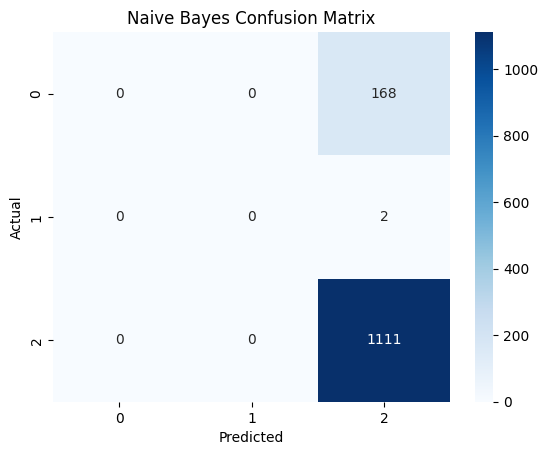

In [23]:
#Calculate confusion matrix using actual values (y_test) and predicted values (y_pred_nb for Naive Bayes)
cm = confusion_matrix(y_test, y_pred_nb)

# Plot the confusion matrix without axis labels
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Add title and labels
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show the plot
plt.show()

In [24]:
# Initialize Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)

In [25]:
# Train the Logistic Regression model
lr_model.fit(X_train_tfidf, y_train)


LogisticRegression(max_iter=1000)

In [26]:
# Predict using Logistic Regression
y_pred_lr = lr_model.predict(X_test_tfidf)

In [27]:
# Evaluate Logistic Regression model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr * 100:.2f}%")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 90.24%
[[  45    0  123]
 [   0    0    2]
 [   0    0 1111]]
              precision    recall  f1-score   support

           0       1.00      0.27      0.42       168
           1       0.00      0.00      0.00         2
           2       0.90      1.00      0.95      1111

    accuracy                           0.90      1281
   macro avg       0.63      0.42      0.46      1281
weighted avg       0.91      0.90      0.88      1281



c:\Users\swath\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\swath\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\swath\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


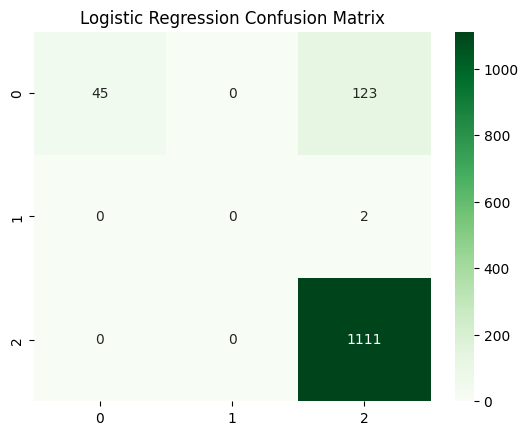

In [28]:
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Greens')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

In [29]:
# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)

RandomForestClassifier(random_state=42)

In [30]:
# Predict on the test data
y_pred_rf = rf_model.predict(X_test_tfidf)


In [31]:
# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.892271662763466
              precision    recall  f1-score   support

           0       0.94      0.20      0.33       168
           1       0.00      0.00      0.00         2
           2       0.89      1.00      0.94      1111

    accuracy                           0.89      1281
   macro avg       0.61      0.40      0.42      1281
weighted avg       0.90      0.89      0.86      1281



c:\Users\swath\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\swath\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\swath\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


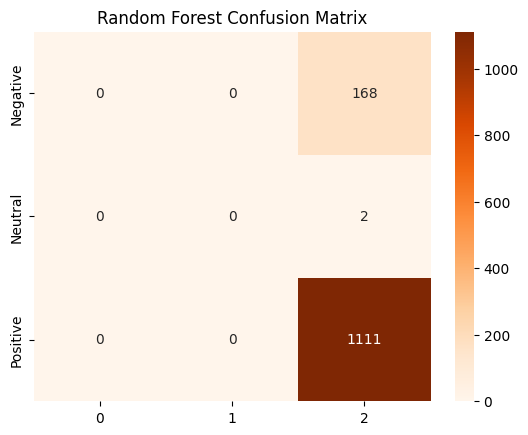

In [32]:
# Plot the confusion matrix using seaborn's heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', yticklabels=['Negative', 'Neutral', 'Positive'])

# Add title and axis labels
plt.title('Random Forest Confusion Matrix')

# Show the plot
plt.show()

In [33]:
# Initialize and train the SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train)

SVC(kernel='linear')

In [34]:
# Predict on the test data
y_pred_svm = svm_model.predict(X_test_tfidf)

In [35]:
# Evaluate the model
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.9110070257611241
              precision    recall  f1-score   support

           0       0.89      0.38      0.53       168
           1       0.00      0.00      0.00         2
           2       0.91      0.99      0.95      1111

    accuracy                           0.91      1281
   macro avg       0.60      0.46      0.49      1281
weighted avg       0.91      0.91      0.89      1281



c:\Users\swath\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\swath\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\swath\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


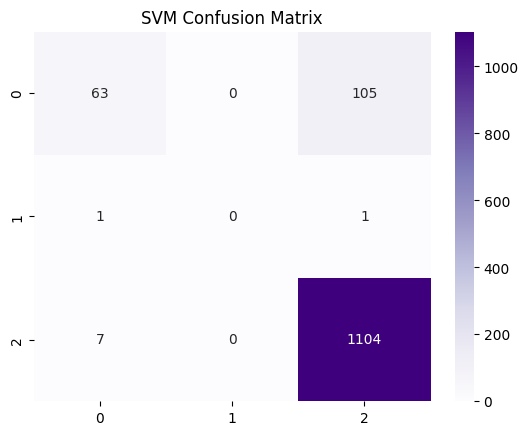

In [36]:
# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Purples')
plt.title('SVM Confusion Matrix')
plt.show()

In [37]:
joblib.dump(svm_model, 'svm_sentiment_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

In [38]:
data = {
    'task': ['Task A', 'Task B', 'Task C', 'Task D'],
    'deadline': [2, 5, 1, 4],  # Days to deadline
    'workload': [5, 2, 7, 3],  # Effort in hours
    'dependency': [1, 0, 1, 0],  # 1 if dependent, 0 if not
    'importance': [3, 2, 4, 1],
    'completion_time': [2, 6, 1.5, 5]  # Historical completion times
}

df = pd.DataFrame(data)


In [39]:
df.head()

,task,deadline,workload,dependency,importance,completion_time
0,Task A,2,5,1,3,2.0
1,Task B,5,2,0,2,6.0
2,Task C,1,7,1,4,1.5
3,Task D,4,3,0,1,5.0


In [40]:
weights = [0.4, 0.3, 0.2, 0.1]
df['priority_score'] = (
    weights[0] * (1 / df['deadline']) +
    weights[1] * df['workload'] +
    weights[2] * df['dependency'] +
    weights[3] * df['importance']
)


In [41]:
df = df.sort_values(by='priority_score', ascending=False)

schedule = []
start_time = 0
for _, row in df.iterrows():
    if row['dependency']:
        dependency_end = next((task['end_time'] for task in schedule if task['task'] == row['dependency']), start_time)
        start_time = dependency_end
    
    end_time = start_time + row['workload']
    schedule.append({
        'task': row['task'],
        'start_time': start_time,
        'end_time': end_time
    })
    start_time = end_time

schedule_df = pd.DataFrame(schedule)


In [42]:
print("🚀 Task Optimization & Scheduling:")
print(schedule_df)


🚀 Task Optimization & Scheduling:
     task  start_time  end_time
0  Task C           0         7
1  Task A           7        12
2  Task D          12        15
3  Task B          15        17


In [45]:
X = df[['workload', 'dependency', 'importance']]
y = df['completion_time']

model = LinearRegression()
model.fit(X, y)

# Predict completion times for new tasks
new_tasks = pd.DataFrame({
    'workload': [3, 6],
    'dependency': [1, 0],
    'importance': [4, 2]
})

new_tasks['predicted_completion_time'] = model.predict(new_tasks)



In [46]:
print("\n🔮 Predictive Analytics:")
print(new_tasks)



🔮 Predictive Analytics:
   workload  dependency  importance  predicted_completion_time
0         3           1           4                        3.5
1         6           0           2                        4.0
